In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif

In [6]:
X_train_final = pd.read_csv(f"../datasets/train/x_train.csv", header=None)
y_train_encoded = pd.read_csv(f"../datasets/train/y_train.csv", header=None)

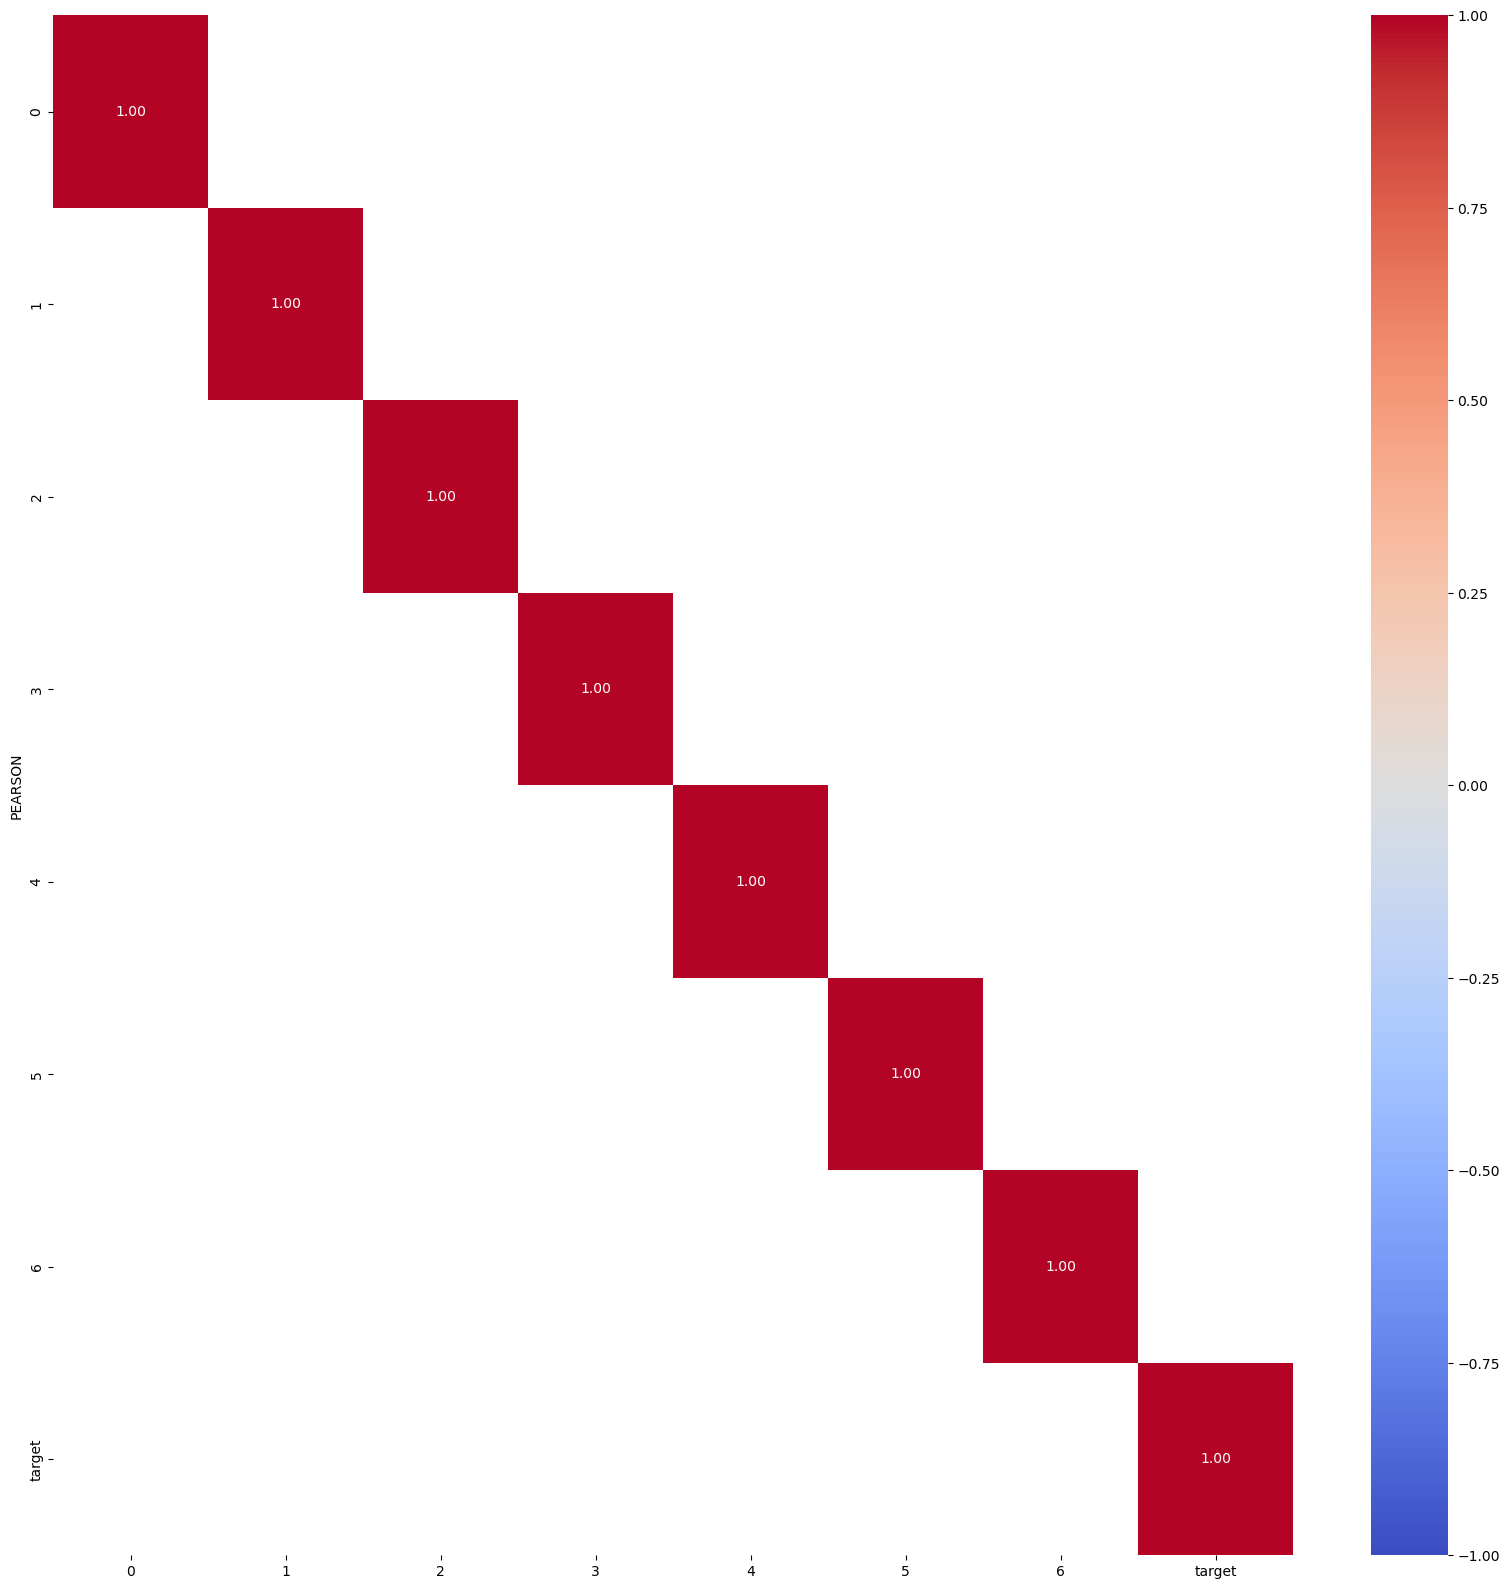

In [7]:
datos_train_corr = X_train_final.copy()
datos_train_corr['target'] = y_train_encoded.copy()


umbral = 0.65
mask_for_heatmap = (datos_train_corr.corr(method='kendall').abs() < umbral)
plt.figure(figsize=(20,20))
sns.heatmap(
    datos_train_corr.corr(method='kendall'), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1,
    mask=mask_for_heatmap)
plt.ylabel('PEARSON')
plt.show()

In [8]:
X_train_cat = X_train_final.copy()
datos_train_corr['target'] = y_train_encoded.copy()
X_train_cat.columns = ["center", "north", "south", "east", "west"] 


# Chi-Square (categóricas, fit en train, transformar ambos)
selector_chi2 = SelectKBest(score_func=chi2, k=5)
X_train_cat_best = selector_chi2.fit_transform(X_train_cat, y_train_encoded)
selected_indices = selector_chi2.get_support()
selected_features = X_train_cat.columns[selected_indices]
scores = selector_chi2.scores_[selected_indices]
print("\nCaracterísticas seleccionadas (Chi-Square):")
for feature, score in zip(selected_features, scores):
    print(f"{feature}: {score:.4f}")

# Aplicar el filtro a test
X_test_cat_best = selector_chi2.transform(X_test_cat)

ValueError: Length mismatch: Expected axis has 7 elements, new values have 5 elements

In [ ]:

# Información mutua (todas, fit en train, transformar ambos)
selector_mi = SelectKBest(score_func=mutual_info_classif, k=10) # también se puede usar mutual_info_regression para problemas de ese tipo
X_train_best = selector_mi.fit_transform(X_train_final, y_train_encoded) # todos los tipos de features
selected_indices = selector_mi.get_support()
selected_features = X_train_final.columns[selected_indices]
scores = selector_mi.scores_[selected_indices]
print("\nCaracterísticas seleccionadas (Inf. mutua):")
for feature, score in zip(selected_features, scores):
    print(f"{feature}: {score:.4f}")

X_test_best = selector_mi.transform(X_test_final)